> # Decision Tree(Regression) #
#### We can use deicision tree in regression problem either. ####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

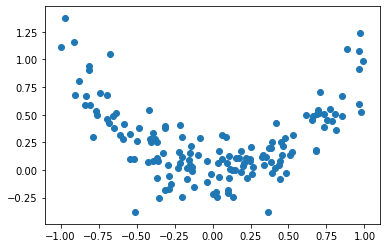

In [2]:
np.random.seed(123)
x = np.random.uniform(-1,1,150)
y = x**2 + 0.2*np.random.randn(150)
plt.scatter(x,y)

In [3]:
x = x.reshape(-1,1)

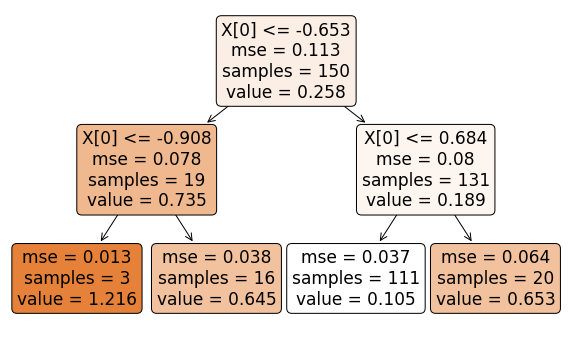

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(x,y)

plt.figure(figsize= (10,6))
plot_tree(tree_reg,rounded= True, filled= True)
plt.show()

#### It is similar to classification tree. Main difference is each node predict a value not a class. And there is mean squared error instead of gini or entrophy. CART algorithm of regression tree works to reduce mse of each node. ####
## $ J(k,t_k) = \frac{m_{\mathsf{left}}}{m}MSE_{\mathsf{left}} + \frac{m_{\mathsf{right}}}{m}MSE_{\mathsf{right}} $ ##

In [5]:
tree_reg1 = DecisionTreeRegressor(max_depth= 2)
tree_reg2 = DecisionTreeRegressor(max_depth= 3)

tree_reg1.fit(x, y)
tree_reg2.fit(x, y)

DecisionTreeRegressor(max_depth=3)

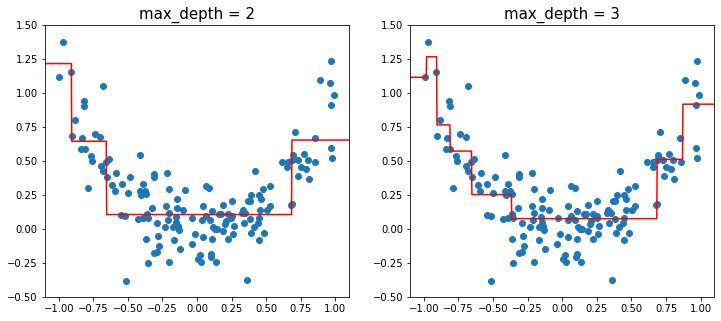

In [6]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

x0 = np.linspace(-1.5,1.5,1000)
x0s = x0.reshape(-1,1)


ax1.axis([-1.1, 1.1, -0.5,1.5]) ; ax1.set_title("max_depth = 2", fontsize = 15)
ax1.scatter(x,y)
y_pred = tree_reg1.predict(x0s)
ax1.plot(x0, y_pred, c='red')


ax2.axis([-1.1, 1.1, -0.5,1.5]) ; ax2.set_title("max_depth = 3", fontsize = 15)
ax2.scatter(x,y)
y_pred = tree_reg2.predict(x0s)
ax2.plot(x0, y_pred, c='red')

#### If there is no regularization, decision tree is easy to be overfitted. Some regularization helps model generalize to other data. ####

In [9]:
tree_reg3 = DecisionTreeRegressor()
tree_reg4 = DecisionTreeRegressor(max_depth= 7, min_samples_leaf= 4)

tree_reg3.fit(x, y)
tree_reg4.fit(x, y)

DecisionTreeRegressor(max_depth=7, min_samples_leaf=4)

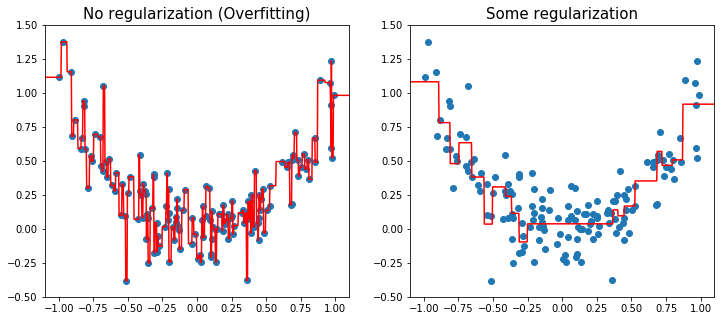

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (12,5))

x0 = np.linspace(-1.5,1.5,1000)
x0s = x0.reshape(-1,1)


ax1.axis([-1.1, 1.1, -0.5,1.5]) ; ax1.set_title("No regularization (Overfitting)", fontsize = 15)
ax1.scatter(x,y)
y_pred = tree_reg3.predict(x0s)
ax1.plot(x0, y_pred, c='red')


ax2.axis([-1.1, 1.1, -0.5,1.5]) ; ax2.set_title("Some regularization", fontsize = 15)
ax2.scatter(x,y)
y_pred = tree_reg4.predict(x0s)
ax2.plot(x0, y_pred, c='red')